In [132]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from datetime import datetime
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

In [63]:
df=pd.read_csv('Dataset.txt',delimiter = "\t") 
pf=pd.read_csv('Dataset_test.txt',delimiter = "\t") 

In [131]:
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F17,F18,F19,F20,F21,F22,C
0,0.224506,0.500340,0.489860,0.902413,7934,-6970,-5714,9982,-5697,4227810299,...,316195953,6176861823,-3433637453,2,1,706,305,1,2,0
1,0.321128,0.281119,0.907283,0.772159,-8238,1219,1663,1287,-3658,-1146724819,...,1378635942,-9031507610,609277486,1,1,423,206,18,7,1
2,0.893441,0.622005,0.998776,0.098386,8540,5266,-9377,-3504,-4511,5947184989,...,-9921889287,-5610051842,-8977995005,2,1,703,315,1,4,0
3,0.320641,0.957234,0.346000,0.646479,-7772,-383,9681,-8661,3474,-5724795826,...,6550322883,-4697085930,4868760308,1,1,122,304,15,1,0
4,0.475961,0.623008,0.544988,0.159709,1571,-8039,-7961,-2385,4407,-3097637172,...,759031103,9984692447,9757408267,1,1,486,240,1,1,0


In [65]:
pf.head()

,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22
0,T30234341,0.654765,0.812009,0.603190,0.391039,-5220,4825,-1784,7447,-7147,...,8074343777,5553595074,9/17/1996,8/18/1990,1,1,436,478,1,1
1,T30234342,0.694636,0.690568,0.473460,0.259760,-618,-5018,2012,9259,9267,...,-5556861821,2216284070,11/7/1985,4/11/1990,1,1,138,56,10,4
2,T30234343,0.203759,0.323301,0.492294,0.011448,-8778,6141,6965,3774,4303,...,-2121815725,-315409510,7/9/1984,5/4/1997,1,1,117,323,10,1
3,T30234344,0.319627,0.286247,0.906197,0.093840,-7929,4471,7715,9543,335,...,1389754605,-3360224957,6/3/1987,7/1/1988,1,1,115,149,16,21
4,T30234345,0.236003,0.782784,0.285689,0.383585,-3296,4564,-1580,-8559,-27,...,3653338555,7604838279,7/17/1984,12/3/1993,1,1,527,281,3,1


In [66]:
df.columns

Index(['Index', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10',
       'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20',
       'F21', 'F22', 'C'],
      dtype='object')

In [67]:
pf.columns

Index(['Index', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10',
       'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20',
       'F21', 'F22'],
      dtype='object')

In [68]:
df.isnull().sum()

Index    0
F1       0
F2       0
F3       0
F4       0
F5       0
F6       0
F7       0
F8       0
F9       0
F10      0
F11      0
F12      0
F13      0
F14      0
F15      0
F16      0
F17      0
F18      0
F19      0
F20      0
F21      0
F22      0
C        0
dtype: int64

In [69]:
pf.isnull().sum()

Index    0
F1       0
F2       0
F3       0
F4       0
F5       0
F6       0
F7       0
F8       0
F9       0
F10      0
F11      0
F12      0
F13      0
F14      0
F15      0
F16      0
F17      0
F18      0
F19      0
F20      0
F21      0
F22      0
dtype: int64

In [70]:
df.drop_duplicates(inplace=True)

In [71]:
pf.drop_duplicates(inplace=True)

In [72]:
df=df.drop(columns=['Index'])

In [74]:
pf=pf.drop(columns=['Index'])

In [75]:
date_cols = ["F15", "F16"]
def date_to_years(d):
    try:
        return (datetime.now() - datetime.strptime(d, "%m/%d/%Y")).days // 365
    except:
        return np.nan

In [76]:
for col in date_cols:
    df[col] = df[col].apply(date_to_years)
    pf[col] = pf[col].apply(date_to_years)

In [78]:
df["F15"].unique()


array([38, 46, 36, 43, 34, 35, 40, 32, 37, 29, 31, 33, 44, 28, 42, 39, 30,
       41, 45, 51, 26, 47, 25, 27, 23, 24, 48, 49, 50, 52, 53, 22, 20, 54,
       21], dtype=int64)

In [79]:
df.drop(columns=['F15','F16'],inplace=True)

In [80]:
pf.drop(columns=['F15','F16'],inplace=True)

In [81]:
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F17,F18,F19,F20,F21,F22,C
0,0.224506,0.500340,0.489860,0.902413,7934,-6970,-5714,9982,-5697,4227810299,...,316195953,6176861823,-3433637453,2,1,706,305,1,2,0
1,0.321128,0.281119,0.907283,0.772159,-8238,1219,1663,1287,-3658,-1146724819,...,1378635942,-9031507610,609277486,1,1,423,206,18,7,1
2,0.893441,0.622005,0.998776,0.098386,8540,5266,-9377,-3504,-4511,5947184989,...,-9921889287,-5610051842,-8977995005,2,1,703,315,1,4,0
3,0.320641,0.957234,0.346000,0.646479,-7772,-383,9681,-8661,3474,-5724795826,...,6550322883,-4697085930,4868760308,1,1,122,304,15,1,0
4,0.475961,0.623008,0.544988,0.159709,1571,-8039,-7961,-2385,4407,-3097637172,...,759031103,9984692447,9757408267,1,1,486,240,1,1,0


In [82]:
x=df.drop(columns=['C'])
y=df['C']

In [108]:
scaler = StandardScaler()
x_scaled=scaler.fit_transform(x)
x_test_sacled=scaler.transform(pf[x.columns])

In [84]:
x_train , x_val , y_train,y_val = train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [85]:
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [89]:
y_val_pred = model.predict(x_val)
print("Classification Report:\n")
print(classification_report(y_val, y_val_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.76      0.99      0.86     15216
           1       0.47      0.03      0.05      5020

    accuracy                           0.75     20236
   macro avg       0.61      0.51      0.45     20236
weighted avg       0.68      0.75      0.66     20236



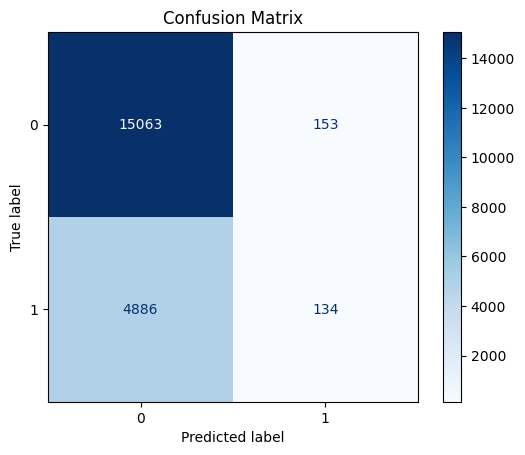

In [111]:
cm=confusion_matrix(y_val,y_val_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [103]:
importances = model.feature_importances_
feature_names = x.columns
indices = np.argsort(importances)[::-1]

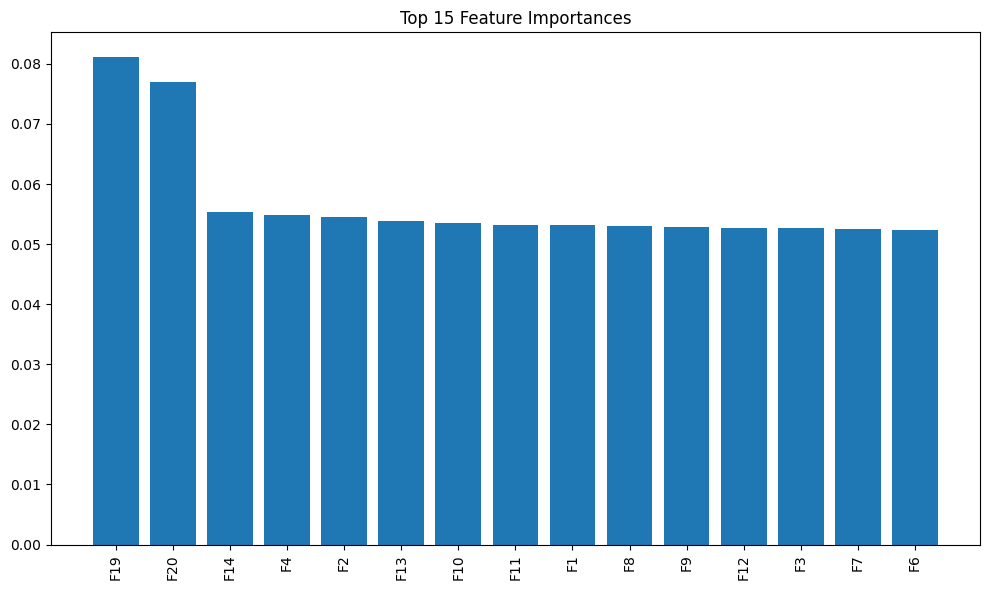

In [104]:
plt.figure(figsize=(10, 6))
plt.title("Top 15 Feature Importances")
plt.bar(range(15), importances[indices][:15], align="center")
plt.xticks(range(15), feature_names[indices][:15], rotation=90)
plt.tight_layout()
plt.show()

In [119]:
pf["Predicted_C"] = model.predict(x_test_sacled)

In [125]:
log_model = LogisticRegression(class_weight = 'balanced',max_iter=10000,random_state=42)
log_model.fit(x_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)

In [126]:
y_val_pre=log_model.predict(x_val)
print("Classification Report:\n")
print(classification_report(y_val, y_val_pre))

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.46      0.62     15216
           1       0.35      0.89      0.51      5020

    accuracy                           0.57     20236
   macro avg       0.64      0.68      0.56     20236
weighted avg       0.78      0.57      0.59     20236



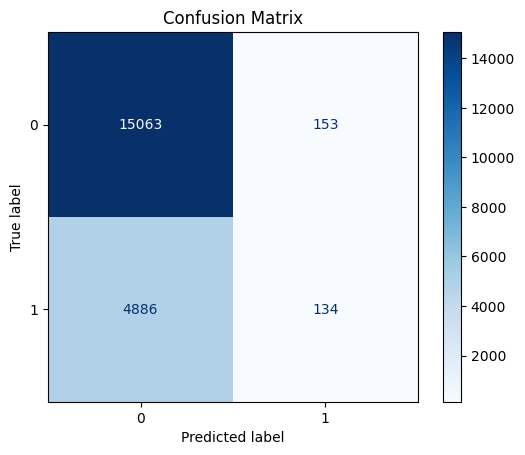

In [129]:
cm=confusion_matrix(y_val,y_val_pre)
dis=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [134]:
xg_model=XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
    use_label_encoder=False,
    eval_metric='logloss',Random_state=42)

In [136]:
xg_model.fit(x_train,y_train)

XGBClassifier(Random_state=42, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [137]:
y_val_pre=xg_model.predict(x_val)
print(" classification report:/n")
print(classification_report(y_val,y_val_pre))

 classification report:/n
              precision    recall  f1-score   support

           0       0.87      0.59      0.70     15216
           1       0.37      0.74      0.49      5020

    accuracy                           0.63     20236
   macro avg       0.62      0.66      0.60     20236
weighted avg       0.75      0.63      0.65     20236



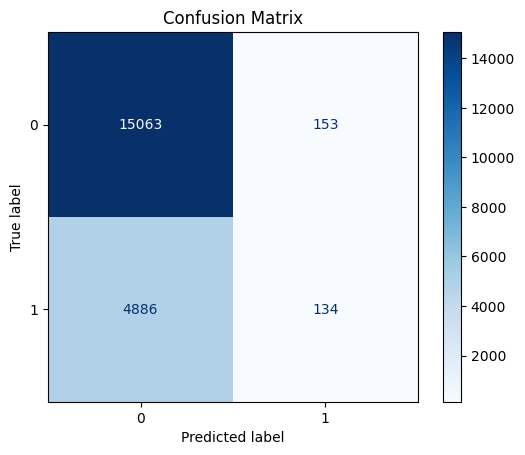

In [138]:
cm=confusion_matrix(y_val,y_val_pre)
dis=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [139]:
importances = model.feature_importances_
feature_names = x.columns
indices = np.argsort(importances)[::-1]

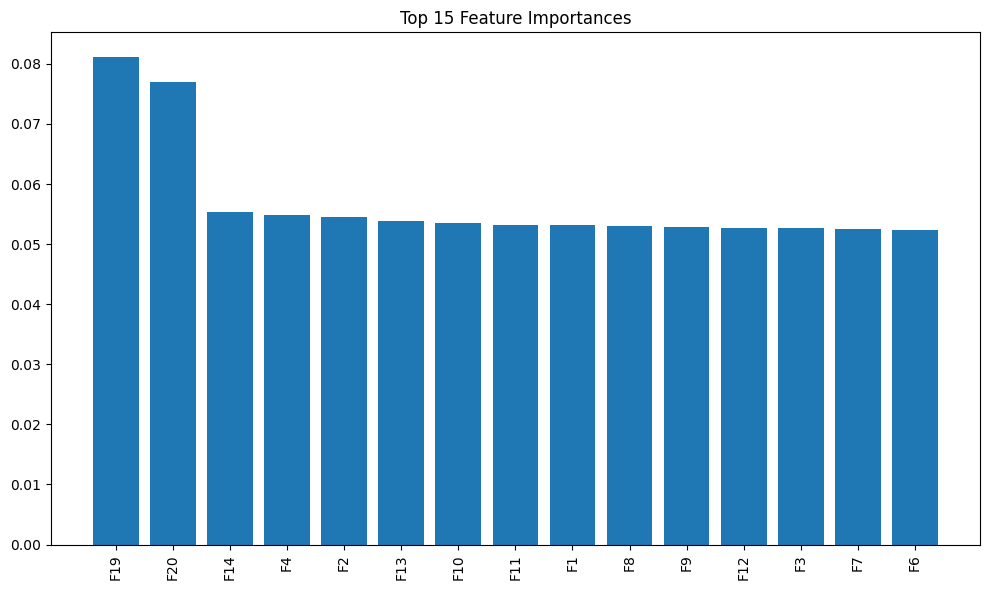

In [141]:
plt.figure(figsize=(10, 6))
plt.title("Top 15 Feature Importances")
plt.bar(range(15), importances[indices][:15], align="center")
plt.xticks(range(15), feature_names[indices][:15], rotation=90)
plt.tight_layout()
plt.show()

In [159]:
pf["Predicted_C_XGB"] = xg_model.predict(x_test_sacled)

In [160]:
pf[["Predicted_C_XGB"]].to_csv("test_predictions_xgb.csv", index=False)